# Interactive web app

With a selector for which processor to apply

In [9]:
# Imports

from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from temp_codes.widgets import *
from temp_codes.data_set import DataSet
from temp_codes.ls_5 import line_source

In [10]:
%%HTML
<script src="temp_codes/widget.js"></script>

In [11]:
# Two processors: line_source and a dummy one

def line_source_widget(t0: t0_widget(), rho: rho_widget()):
    data_set = data_set_selector.data_set
    model = line_source(data_set, t0=t0,rho=rho)
    display_widget.set(data_set, model)
    return None
line_source_widget = interactive(line_source_widget)

def f(x=1):
    return (len(data_set_selector.data_set.times)+x)
f_interact = interactive(f)

processors = {"line_source": line_source_widget, "f": f_interact}

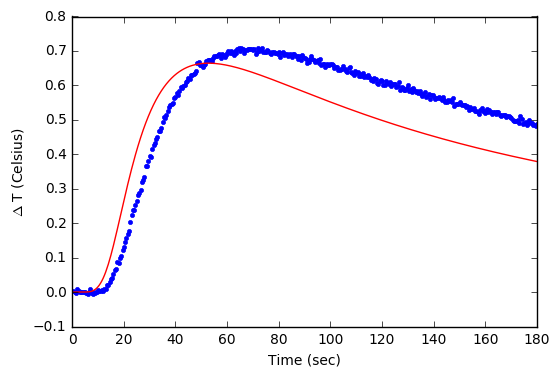

In [12]:
# Build the application and its widgets

data_set_selector = DataSetUploadWidget(DataSet)
data_set_selector.data_set = DataSet("temp_codes/agar_data_try.dat")

processor_selector = widgets.Select(options=list(processors.keys()), description='Processors:')

processor_widget   = widgets.HBox([])
display_widget     = DisplayWidget()

def set_processor(t):
    if t['name'] == "value":
        processor_widget.children=(processes[t['new']],)
processor_selector.observe(set_processor)

application = widgets.VBox([data_set_selector,
                            processor_selector,
                            processor_widget,
                            display_widget])
application